In [1]:
import utils
import skimage
import skimage.morphology
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def extract_boundary(im: np.ndarray) -> np.ndarray:
    """
        A function that extracts the inner boundary from a boolean image.

        args:
            im: np.ndarray of shape (H, W) with boolean values (dtype=np.bool)
        return:
            (np.ndarray) of shape (H, W). dtype=np.bool
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    # You can also define other helper functions
    structuring_element = np.array([
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ], dtype=bool)
    return im ^ (skimage.morphology.erosion(im, structuring_element))
    ### END YOUR CODE HERE ###

Reading image: images\lincoln.png
Saving image to: image_processed\lincoln-boundary.png


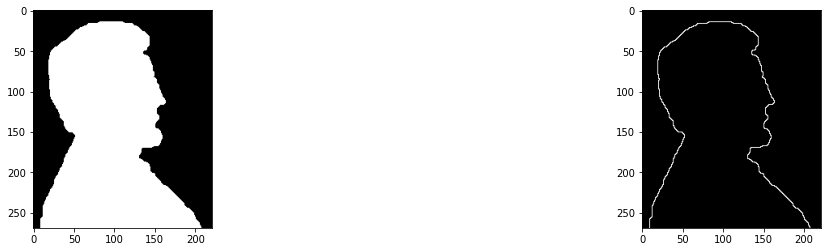

In [3]:
if __name__ == "__main__":
    im = utils.read_image("lincoln.png")
    binary_image = (im != 0)
    boundary = extract_boundary(binary_image)

    assert im.shape == boundary.shape, "Expected image shape ({}) to be same as resulting image shape ({})".format(
            im.shape, boundary.shape)
    assert boundary.dtype == np.bool, "Expected resulting image dtype to be np.bool. Was: {}".format(
            boundary.dtype)

    boundary = utils.to_uint8(boundary)
    utils.save_im("lincoln-boundary.png", boundary)
    
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1) 
    plt.imshow(im, cmap='gray')
    plt.subplot(1, 2, 2) 
    plt.imshow(boundary, cmap='gray')